# Marker analysis

- fold change heatmaps

In [1]:
import braian
import braian.config
import braian.plot as bap
import braian.stats as bas

import plotly.io as pio
from pathlib import Path

# This ensures BraiAn's figures works in multiple places:
pio.renderers.default = "plotly_mimetype+notebook"

root_dir = Path.cwd().absolute().parent      # braian experiment root
config_file = root_dir/"config_example.yml"  # configuration path
config = braian.config.BraiAnConfig(config_file, root_dir/"data") # we instantiate the config

In [2]:
ontology = config.read_atlas_ontology()

In [3]:
experiment = config.experiment_from_csv(fill_nan=False)

In [4]:
group_hc_similarity = braian.AnimalGroup(
    experiment.hc.name,
    [bas.markers_similarity_index(braian.AnimalBrain.merge_hemispheres(b), "cFos", "Arc") for b in experiment.hc.animals],
    hemisphere_distinction=False,
    brain_ontology=ontology,
    fill_nan=True
)

group_ctx_similarity = braian.AnimalGroup(
    experiment.ctx.name,
    [bas.markers_similarity_index(braian.AnimalBrain.merge_hemispheres(b), "cFos", "Arc") for b in experiment.ctx.animals],
    hemisphere_distinction=False,
    brain_ontology=ontology,
    fill_nan=True
)

group_fc_similarity = braian.AnimalGroup(
    experiment.fc.name,
    [bas.markers_similarity_index(braian.AnimalBrain.merge_hemispheres(b), "cFos", "Arc") for b in experiment.fc.animals],
    hemisphere_distinction=False,
    brain_ontology=ontology,
    fill_nan=True
)

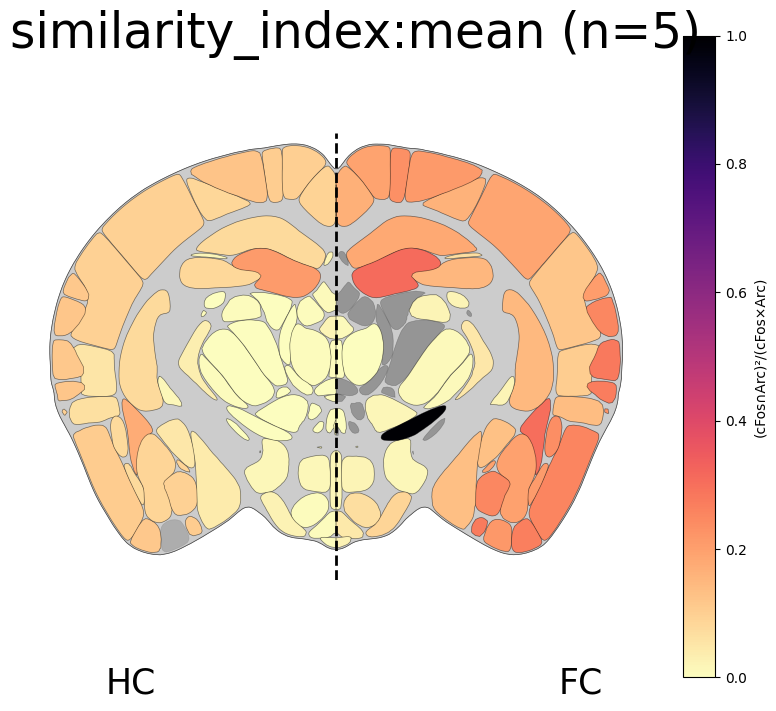

In [5]:
from IPython.display import display

depths = 7000 # in µm

bap.heatmap(
    bd1=group_hc_similarity.mean["cFos+Arc"],
    bd2=group_fc_similarity.mean["cFos+Arc"],
    brain_regions=ontology.get_regions("summary structures"),
    orientation="frontal", depth=depths,
    show_acronyms=False,
)

In [6]:
foldchange_hc_fc = braian.AnimalGroup(
    group_fc_similarity.name,
    [bas.fold_change(b, group_hc_similarity) for b in group_fc_similarity.animals],
    hemisphere_distinction=False,
    brain_ontology=ontology,
    fill_nan=True
)

3500.00  5000.00  7000.00  8000.00  9000.00  


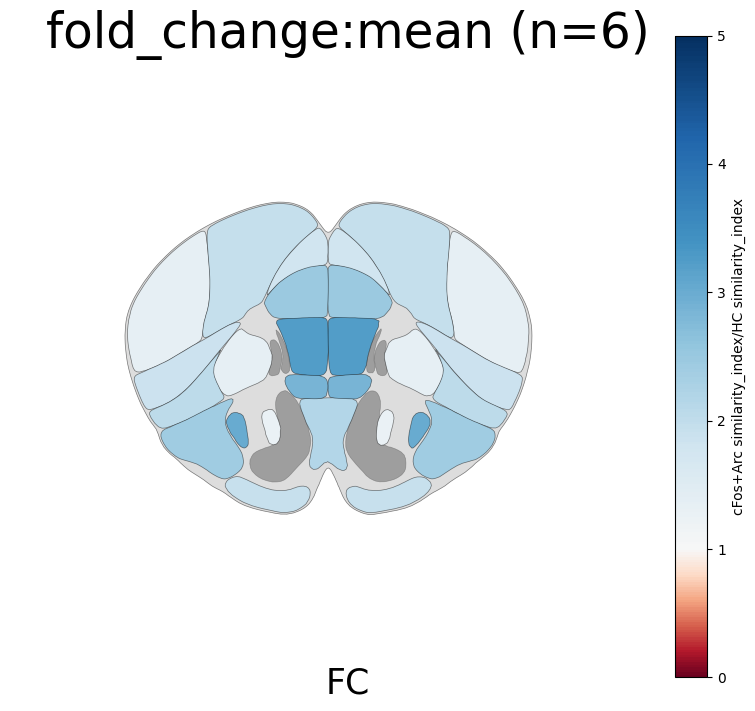

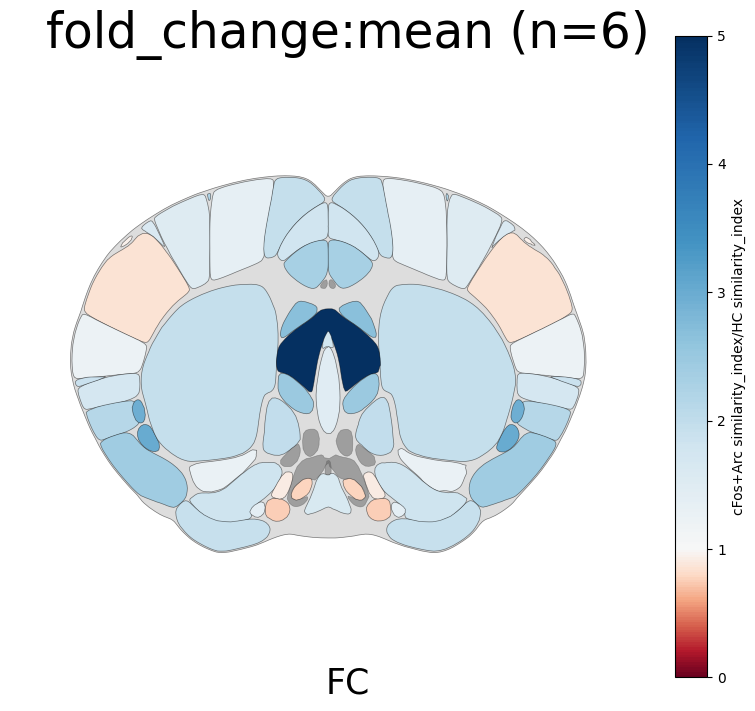

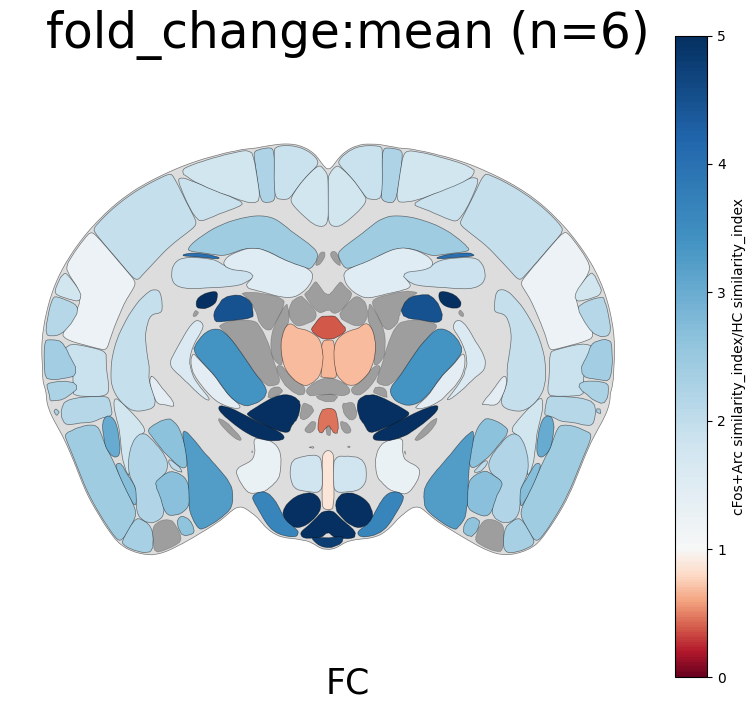

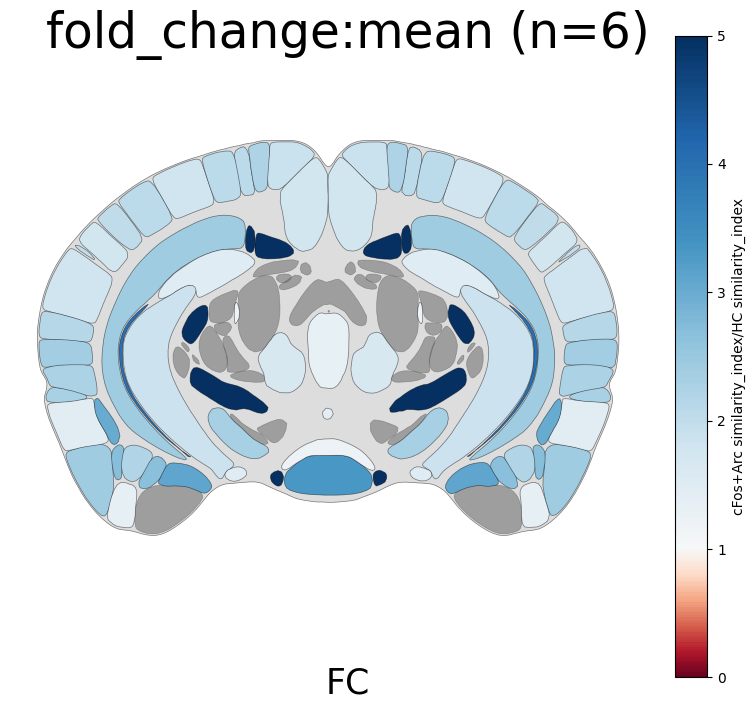

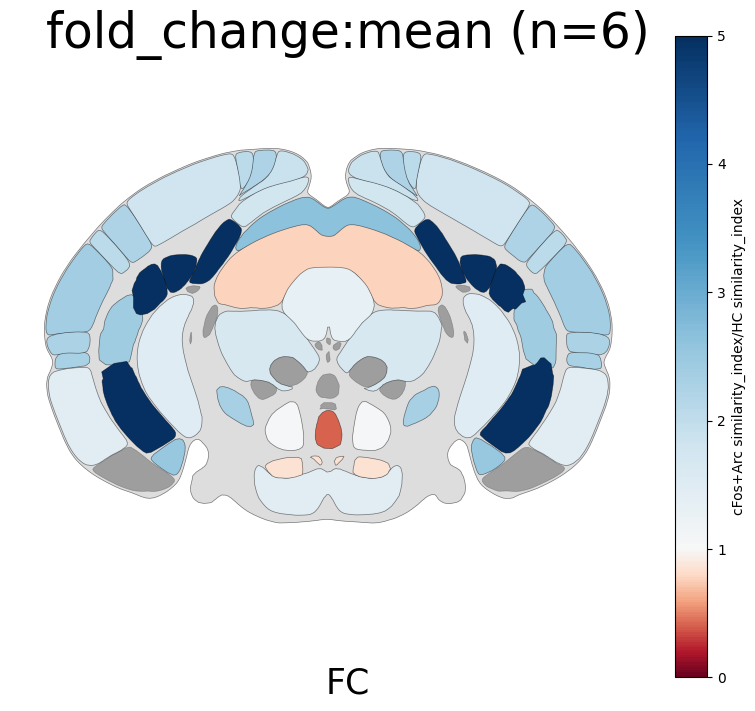

In [7]:
from IPython.display import display

depths = (3500, 5000, 7000, 8000, 9000) # in µm

for depth, heatmap in bap.heatmap(
    foldchange_hc_fc.mean["cFos+Arc"],
    brain_regions=ontology.get_regions("summary structures"),
    orientation="frontal", depth=depths,
    centered_cmap=True, cmin=0, ccenter=1, cmax=5
).items():
    display(heatmap)